In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
#load image that you want to visualize
from scipy import misc
image=misc.imread('image5.png',mode='L')
#image=255-image
image=np.reshape(image,[1,28,28,1])
image=image.astype(dtype=np.float32,copy=False)
X=image

In [3]:
#now make a computation graph
def ConvLayer(X,no_of_filters,filter_size):
    in_channels=int(X.shape[3])
    W=tf.get_variable("filter",dtype=tf.float32,initializer=tf.random_normal([filter_size,filter_size,in_channels,no_of_filters]))
    b=tf.get_variable("bias",dtype=tf.float32,initializer=tf.random_normal([no_of_filters]))
    
    out=tf.nn.relu(tf.add(tf.nn.conv2d(input=X,filter=W,strides=[1,1,1,1],padding='SAME'),b))
    pool=tf.nn.max_pool(value=out,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
    return pool

In [4]:
def FcLayer(X,out_layer):
    in_layer=int(X.shape[1])
    
    W=tf.get_variable("Weights",dtype=tf.float32,initializer=tf.random_normal([in_layer,out_layer],dtype=tf.float32))
    b=tf.get_variable("Bias",dtype=tf.float32,initializer=tf.random_normal([out_layer],dtype=tf.float32))
    
    out=tf.add(tf.matmul(X,W),b)
    return out

In [5]:

with tf.variable_scope("Conv_layer1"):
    out1=ConvLayer(X,32,5)
with tf.variable_scope("Conv_layer2"):
    out2=ConvLayer(out1,64,5)
with tf.variable_scope("Conv_layer3"):
    out3=ConvLayer(out2,128,2)

channels=int(out3.shape[3])
length=int(out3.shape[2])
breadth=int(out3.shape[1])

out3=tf.reshape(out3,[-1,length*breadth*channels])

with tf.variable_scope("Fc_layer1"):
    fc_out1=FcLayer(out3,3072)
    fc_out1=tf.nn.relu(fc_out1)

with tf.variable_scope("Fc_layer2"):
    fc_out2=FcLayer(fc_out1,10)

yoyo=tf.nn.softmax(fc_out2)
prediction=tf.arg_max(yoyo,dimension=1)

In [6]:
sess=tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [7]:
tf.train.Saver().restore(sess,'trained_params/')

INFO:tensorflow:Restoring parameters from trained_params/


Original Image


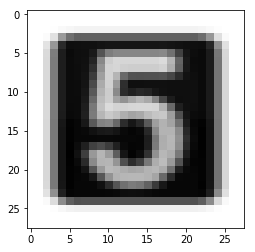

output of the first convolutional layer


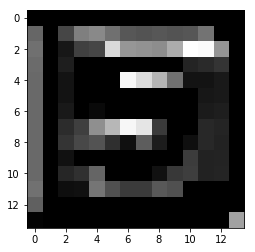

output of the second convolutional layer


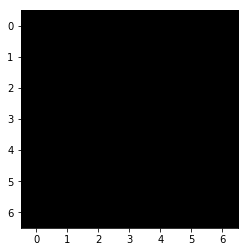

output of the third convolutional layer


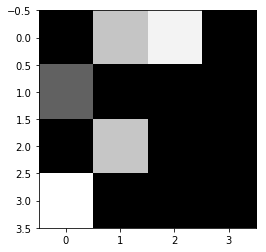

Prediction is:  [5]


In [8]:
image=np.reshape(image,[28,28])
plt.imshow(image,cmap='gray')
print('Original Image')
plt.show()

array=sess.run(out1)
array=array.astype(np.uint8)
plt.imshow(array[0,:,:,23],cmap='gray')
print('output of the first convolutional layer')
plt.show()

array=sess.run(out2)
array=array.astype(np.uint8)
plt.imshow(array[0,:,:,63],cmap='gray')

print('output of the second convolutional layer')
plt.show()

array=sess.run(out3)
array=np.reshape(array,[1,length,breadth,channels])

array=array.astype(np.uint8)
plt.imshow(array[0,:,:,6],cmap='gray')
print('output of the third convolutional layer')
plt.show()


print('Prediction is: ',sess.run(prediction))

In [ ]:
#%qtconsole
